<a href="https://colab.research.google.com/github/JakeSiewJK64/colabNotebooks/blob/master/qlearningReinforcementLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1> OpenAI Gym</h1></center>

In [144]:
!pip install gym

In [145]:
import gym

In [146]:
# frozen lake environment
env = gym.make('FrozenLake-v0')

In [147]:
print("# of states: ", env.observation_space.n) # number of states
print("# of actions: " ,env.action_space.n) # number of actions

# of states:  16
# of actions:  4


In [148]:
env.reset() # resets the environment to default state

0

In [149]:
action = env.action_space.sample()
print("Random Action: ", action) # generates a random action

Random Action:  1


In [150]:
# what this means:
# return to us new_state, reward, done and info
# when i input env.step(action)
new_state, reward, done, info = env.step(action)

In [151]:
print(new_state)
print(reward)
print(done)
print(info)

4
0.0
False
{'prob': 0.3333333333333333}


In [152]:
env.render()
env.reset()

  (Down)
SFFF
FHFH
FFFH
HFFG


0

## Implementing Q-Learning

In [153]:
import numpy as np
import time

env = gym.make("FrozenLake-v0")
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [154]:
Q = np.zeros((STATES,ACTIONS)) # initialize all blank values, agent doesnt know about the environment yet
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## DEFINE CONSTANTS


In [155]:
EPISODES = 2000 # how many times to run the environment from the beginning, more episodes better
MAX_STEPS = 100 # max number of steps allowed for each run of environment, agent could be stuck in a loop
LEARNING_RATE = 0.81 # rate of change
GAMMA = 0.96 # discount factor

## picking an action

In [156]:
epsilon = .9 # start with 90% chance of picking a random action
# 90% chance random
# 10% chance to refer q table

# code to pick an action
if np.random.uniform(0, 1) < epsilon: # pick a value between 0 and 1
  action = env.action_space.sample()
else:
  action = np.argmax(Q[state, :])

In [157]:
# resets the state
state = env.reset()

> $ Q[state, action] = Q[state, action] + \alpha * (reward + \gamma * max(Q[newState, :]) - Q[state, action]) $

In [158]:
Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[new_state, :]) - Q[state, action])

In [159]:
# if you would like to see training set to true
RENDER = False

Q = np.zeros((STATES, ACTIONS))

EPISODES = 2000 # how many times to run the environment from the beginning, more episodes better
MAX_STEPS = 100 # max number of steps allowed for each run of environment, agent could be stuck in a loop
LEARNING_RATE = 0.81 # rate of change
GAMMA = 0.96 # discount factor

rewards = [] # to be graphed later

In [160]:
for episodes in range(EPISODES):
  state = env.reset()
  for _ in range(MAX_STEPS): # xplore up to MAX_STEPS
    if RENDER:
      env.render()
    
    if np.random.uniform(0, 1) < epsilon:
      # pick a random action
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])
    
    next_state, reward, done, _ = env.step(action) # '_' we dont need the info value
    
    # defining the formula
    Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= .001
      break # we have completed the game
print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}")

[[1.44671350e-02 1.02030657e-02 2.08342918e-01 1.49002827e-02]
 [6.28979092e-03 1.33359837e-05 2.68249075e-03 1.29999090e-01]
 [5.73461542e-03 3.94775627e-03 5.10192598e-03 7.40382182e-02]
 [2.27177618e-03 1.90297883e-03 1.34987308e-03 2.17672964e-02]
 [1.47038250e-01 1.02348968e-02 5.55895867e-03 8.72227084e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.28487122e-02 8.39195018e-06 8.81857376e-06 1.89254744e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.16344321e-03 3.88054388e-04 6.91761066e-03 3.38120183e-01]
 [2.18880481e-03 8.81028389e-02 8.06388749e-03 6.62216165e-03]
 [6.25767949e-04 4.42648506e-04 7.80902878e-01 3.75476091e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.42364668e-02 3.73145589e-03 8.30261539e-01 2.55346484e-02]
 [1.43111150e-01 1.86613529e-01 1.82926182e-01 9.72973128e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

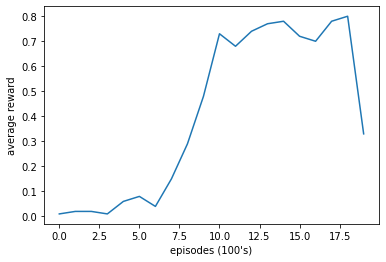

In [163]:
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel("average reward")
plt.xlabel("episodes (100\'s)")
plt.show()

In [162]:
print(avg_rewards)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0